### Linear Models for Classification 

Linear models are extensively used for classification. The formula looks similair to linear regression - except if the function is smaller than 0, we classify as -1, if larger than 0, classify as 1. 

For linear models for classification, the decision boundary is a linear function of the input. A binary classifier seperates two classes using a line/plane/or hyperplane. 

The two most common linear classifications include **Logistic Regression**, and **Linear support vector machines** (Linear SVM).

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


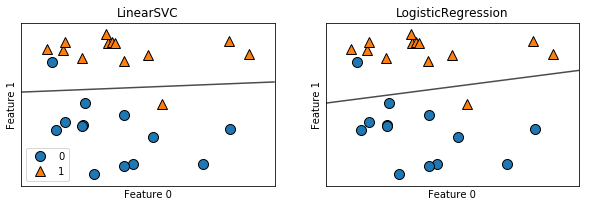

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

Both models come up with similiar boundary, and both apply an L2 Regularization. There is a tradeoff parameter that determines the strength of the regularization called C. Higher C tries to fit the training data as best as possible, and will stress the importance of each individual data point being classfied correctly. Low values of C will cause the algorithm to adjust to the majority, and emphasize coefficient vector *w* being close to 0.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

print('\n---Using C = 1----')
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

print('\n---Using C = 100----')
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

print("\n Using L1 Regularization, C = 1")
logreg = LogisticRegression(penalty = "l1").fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

print('\n---Using C = 100 and L1 Reg----')
logreg100 = LogisticRegression(C=100, penalty = "l1").fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))


---Using C = 1----
Training set score: 0.955
Test set score: 0.958

---Using C = 100----
Training set score: 0.972
Test set score: 0.965

 Using L1 Regularization, C = 1
Training set score: 0.960
Test set score: 0.958

---Using C = 100 and L1 Reg----
Training set score: 0.986
Test set score: 0.979


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Math Background for Logistic Regression

This model arises from the desire to model the posterior probabilities of the K classes via linear functions in x, while ensuring that they sum to one and remain in [0.1]. 

<img src=./images/linear_class/log1.png/>

This logistic function is also called the sigmoid function $$\frac{1}{1 + e^{-t}}$$

The logistic function looks like a big S and will transform any value into the range 0 to 1. This is useful because we can apply a rule to the output of the logistic function to snap values to 0 and 1 (e.g. IF less than 0.5 then output 1) and predict a class value.

Because of the way that the model is learned, the predictions made by logistic regression can also be used as the probability of a given data instance belonging to class 0 or class 1. This can be useful for problems where you need to give more rationale for a prediction.

Like linear regression, logistic regression does work better when you remove attributes that are unrelated to the output variable as well as attributes that are very similar (correlated) to each other.

It's a fast model to learn and effective on binary classification problems.

Logistic Regression models are usually fit by maximum likelihood, using the conditional likelihood G given X.

<img src=./images/linear_class/log2.png/>

### Math Background for SVM

SVM can be thought of as a generalization for decision boundaries for classification. In the linear case, this would be a line in 2D or a hyperplane in higher dimensions. SVMS also can take on non-linear decision boundaries. 

In the linear case, we find the hyperplane with the biggest margin between the training points for class 1  and -1. 

### Linear Multiclassification

Most linear classification models are for binary classification only, and don't extend to multiclass (logistic does!). Common technique incluedes **one vs. rest*.

In OVR, a binary class is is learned for each class that tries to seperate that class from all other classes, resulting in as many binary models as there are classes. The classifier that has the highest sccore on its single class wins

Coefficients:  [[-0.17492579  0.23140979]
 [ 0.47622784 -0.06935848]
 [-0.18914152 -0.20400543]]
Intercepts:  [-1.07745455  0.13137656 -0.08604998]


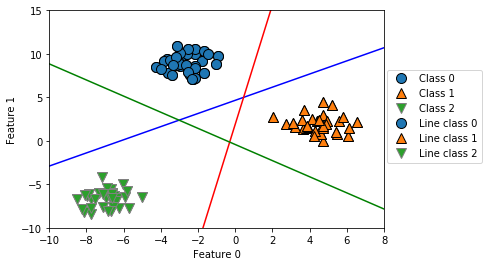

In [36]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
linear_svm = LinearSVC().fit(X, y)
print("Coefficients: ", linear_svm.coef_)
print("Intercepts: ", linear_svm.intercept_)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) #x, -(x*w1 + b)/w2
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
    'Line class 2'], loc=(1.01, 0.3))

<img src=./images/linear_class/svm1.png/>

#### Strengths and Weaknesses

The main parameter of linear models if the regularization parameter, called alpha in the regression models and C in LinearSVC and Logistic Regression.

If you assume only a few features are important, use L1. Linear models are fast to train, fast to predict, and easy to understand. Linear models often perform well when the number of features is large compared to the number of samples, however in lower dimensions, other models may perform better.